<font size="2.5">

# Pymaceuticals Inc.
### Analysis

> - Based on the data from the gender pie chart summary calculation, this study had a good and even representation of male vs. female mice<br> 
<br>
> - Based on the Final Tumor Volume box plot, a conclusion could be drawn that mice on the Capomulin and Ramicane regimens fared better than<br>
> the mice on the Infubinol and Ceftamin regimens. This is because the tumor volume at the final / latest timepoint for the mice on the<br>
> regimens was on average quite a bit smaller on Capomulin and Ramicane than they were on Infubinol and Ceftamin<br>
<br>
> - Based on the line plot of mouse B128 on the Capomulin treatment, a decrease in tumor volume over time is very noticeable within the first<br>
> 35 days. However, the last 10 days there is what seems to be tumor rebound growth.  This may seem to indicate that Campomulin is an effective<br>
> treatment for a certain period of time, but the tumor may become resistant to the treatment after long enough exposure to the regimen<br>
<br>
> - Visually, one could initially determine that a positive and noticeable correlation between increase in mouse weight causes an increase <br>
> in average tumor volume. This is because the scatter plot of the regression model does look like a very positive correlation at first glance<br>
<br>
> - However, once the regression calculation, slope, intercept r-value, and r-squared value are calculated and plotted onto the scatter plot,<br>
> a correlation coefficient of under 1 (0.7) shows a positive correlation, but an imperfect one. <br>
 

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [145]:
# Checking the number of mice.
print(f'The number of mice in this experiment is: {len(mouse_study_complete["Mouse ID"].unique())}')

The number of mice in this experiment is: 249


In [146]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ID = mouse_study_complete.loc[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicate_mouse_ID)

['g989']


In [147]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == duplicate_mouse_ID[0], :]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [148]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study_complete.drop(mouse_study_complete[mouse_study_complete["Mouse ID"] == duplicate_mouse_ID[0]].index)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [164]:
# Checking the number of mice in the clean DataFrame.
print(f'The new number of mice after removing the duplicate mouse is: {len(cleaned_df["Mouse ID"].unique())}')

The new number of mice after removing the duplicate mouse is: 248


## Summary Statistics

In [165]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).mean()
median = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).median()
variance = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).var()
std_dev = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).std()
sem = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_vol_summary_simple = pd.DataFrame({
    "Mean Tumor Volume (mm3)": mean,
    "Median Tumor Volume (mm3)": median,
    "Variance of Tumor Volume": variance,
    "Standard Deviation of Tumor Volume": std_dev,
    "Standard Error of Tumor Volume": sem
})

# Display the summary DataFrame
tumor_vol_summary_simple

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [166]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_advanced = cleaned_df.groupby(cleaned_df["Drug Regimen"])[['Tumor Volume (mm3)']].agg(["mean", "median", "var", "std","sem"])

# Display the Dataframe created using this more advanced method
tumor_summary_advanced
                                                                                                               

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

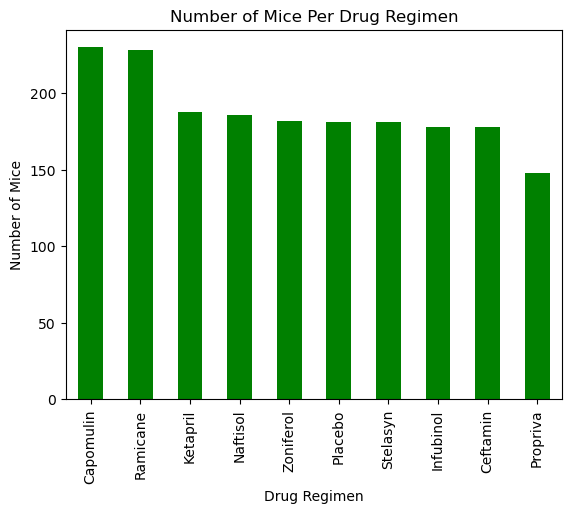

In [225]:
# Calculate the number of rows each drug regimen appears in to capture the number of mice per DrugRegimen
drug_reg_count = cleaned_df["Drug Regimen"].value_counts()

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using the Pandas plot() method
drug_reg_count.plot.bar(x = "Drug Regimen",
                        y = "Number of Mice",
                        ylabel = "Number of Mice",
                        title = "Number of Mice Per Drug Regimen",
                        color="g", 
                        fontsize = 10)
plt.savefig('../Pymaceuticals/data/pandas_bar_plot.png', bbox_inches='tight')

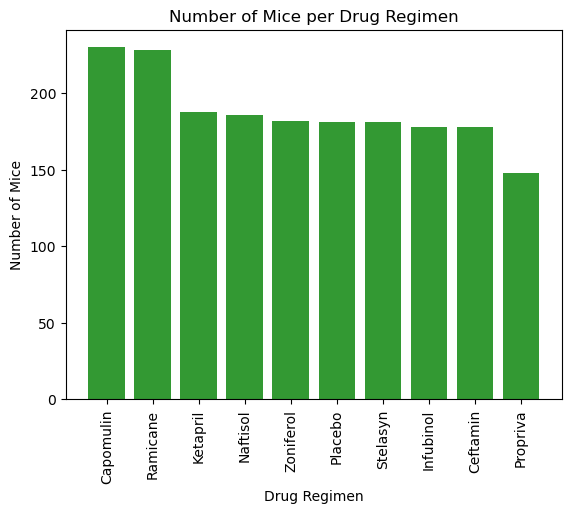

In [255]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_reg_count.index.values, drug_reg_count.values, color='g', alpha=0.8, align='center')

# Set the xlabel and ylabel, title of new Pyplot bar plot
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

# save figure to file in project directory
plt.savefig('../Pymaceuticals/data/pyplot_bar_plot.png', bbox_inches='tight')

# Display the plot
plt.show()

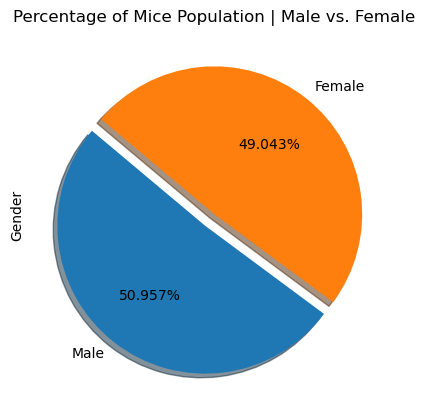

In [265]:
# Capture the count of male versus female mice
mice_gender_count = cleaned_df["Sex"].value_counts()


# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
mice_gender_count.plot.pie(startangle=140, 
                           title="Percentage of Mice Population | Male vs. Female", 
                           ylabel="Gender", 
                           explode = (0.1, 0), 
                           shadow = True, 
                           autopct='%1.3f%%')

# save figure to file in project directory
plt.savefig('../Pymaceuticals/data/pandas_pie_plot.png', bbox_inches='tight')


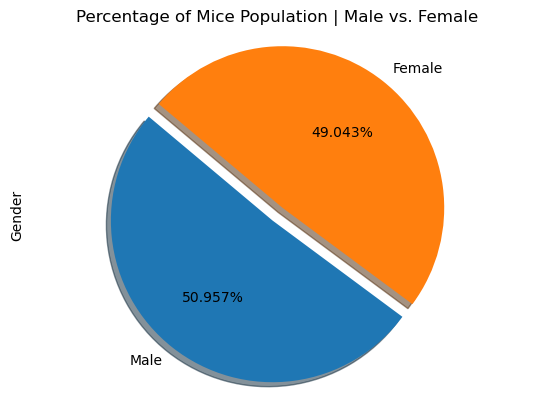

<Figure size 640x480 with 0 Axes>

In [274]:
# Generate a pie chart using pyplot showing the distribution of unique female versus male mice used in the study
plt.pie(mice_gender_count, 
        explode=(0.1,0),
        autopct="%1.3f%%", 
        shadow=True, 
        labels=["Male", "Female"],
        startangle=140)

# title, label the axes, and display the plot
plt.ylabel("Gender")
plt.axis("equal")
plt.title("Percentage of Mice Population | Male vs. Female")
plt.show()

# save figure to file in project directory
plt.savefig('../Pymaceuticals/data/plt_pie_plot.png', bbox_inches='tight')

## Quartiles, Outliers and Boxplots

In [275]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# separate each drug regimen into individual dataframes so we can capture the value of
# the tumor volume at the latest timepoint for each drug regimen
capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
ramicane = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane",:]
infubinol = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol",:]
ceftamin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin",:]

# Capture the last (greatest) timepoint for each mouse for each Drug Regimen
capomulin_max = capomulin.groupby('Mouse ID').max()['Timepoint']
ramicane_max = ramicane.groupby('Mouse ID').max()['Timepoint']
infubinol_max = infubinol.groupby('Mouse ID').max()['Timepoint']
ceftamin_max = ceftamin.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(capomulin_max, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge = pd.merge(ramicane_max, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge = pd.merge(infubinol_max, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge = pd.merge(ceftamin_max, cleaned_df, on=("Mouse ID","Timepoint"),how="left")

# Re-Merge the Drug Regimen tumor volume at latest timepoint into one dataframe for calculation in a for loop
final_merge = pd.concat([capomulin_merge, ramicane_merge, infubinol_merge, ceftamin_merge])

In [285]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]

# Create list with tumor volume data for each Drug Regimen for plotting and calcuations.  
# The assignment instructions show to create an empty list to fill with tumor volume data,
# But I filled this list with the data now so that I could call it in the for loop more
# efficiently
tumor_volume_list = [capomulin_merge["Tumor Volume (mm3)"], 
                     ramicane_merge["Tumor Volume (mm3)"], 
                     infubinol_merge["Tumor Volume (mm3)"],
                     ceftamin_merge["Tumor Volume (mm3)"]]

# Use a for loop to cycle through each Drug name to capture data for each
for i in range(len(treatment_list)):
    
    # With each for loop iteration, capture the tumor volumes 
    tumor_volume = tumor_volume_list[i]

    # With each for loop iteration, capture the lower quantile, upper quantile, and iqr
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq - lowerq, 4)
    median = tumor_volume.median()

    # Print the results of each for loop iteration for each chemical
    print(f"\033[4m{treatment_list[i]} Results:\033[0m")
    print(f"  Lower Quartile is: {lowerq}")
    print(f"  Upper Quartile is: {upperq}")
    print(f"  The Median Value is: {median}")
    print(f"  Interquartile Range (IQR) is: {iqr}")
    
    # Calculate potential outliers (below the lower bound or above the upper bound)
    lower_boundary = lowerq - (1.5 * iqr)
    upper_boundary = upperq + (1.5 * iqr)
    
    # Print any potential outliers or print "None" if none fall below the lower bound or above the upper bound
    # I am converting the outlier_results calcuation to a simple list so there isn't a dtype and name display
    # that shows up and makes reading each summary difficult
    outlier_results = round(tumor_volume[(tumor_volume < lower_boundary) | (tumor_volume > upper_boundary)], 4)
    print(f"  Potential Outlier Results: {outlier_results.tolist() if not outlier_results.empty else 'None'}")
    print()
 


Capomulin Results:
  Lower Quartile is: 32.37735684
  Upper Quartile is: 40.1592203
  The Median Value is: 38.1251644
  Interquartile Range (IQR) is: 7.7819
  Potential Outlier Results: None

Ramicane Results:
  Lower Quartile is: 31.56046955
  Upper Quartile is: 40.65900627
  The Median Value is: 36.56165229
  Interquartile Range (IQR) is: 9.0985
  Potential Outlier Results: None

Infubinol Results:
  Lower Quartile is: 54.04860769
  Upper Quartile is: 65.52574285
  The Median Value is: 60.16518046
  Interquartile Range (IQR) is: 11.4771
  Potential Outlier Results: [36.3213]

Ceftamin Results:
  Lower Quartile is: 48.72207785
  Upper Quartile is: 64.29983003
  The Median Value is: 59.85195552
  Interquartile Range (IQR) is: 15.5778
  Potential Outlier Results: None



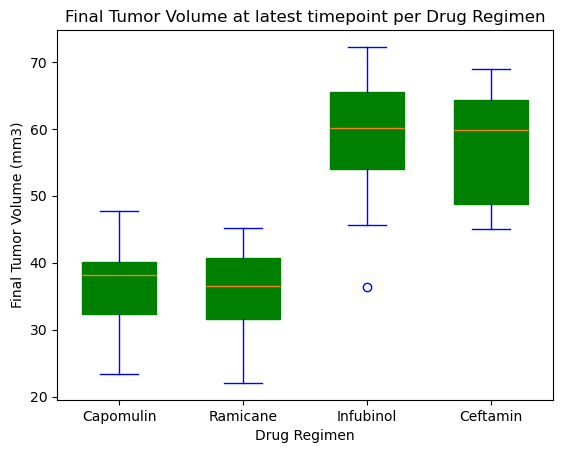

In [291]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume at latest timepoint per Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_volume_list, labels=treatment_list, 
            widths = 0.6, patch_artist = True, 
            vert=True, 
            boxprops=dict(facecolor="green", color="green"),
            flierprops=dict(color="blue", markeredgecolor="blue"),
            whiskerprops=dict(color="blue"),
            capprops=dict(color="blue"))

# save figure to file in project directory
plt.savefig('../Pymaceuticals/data/box_plot.png', bbox_inches='tight')

# show box plot
plt.show()

## Line and Scatter Plots

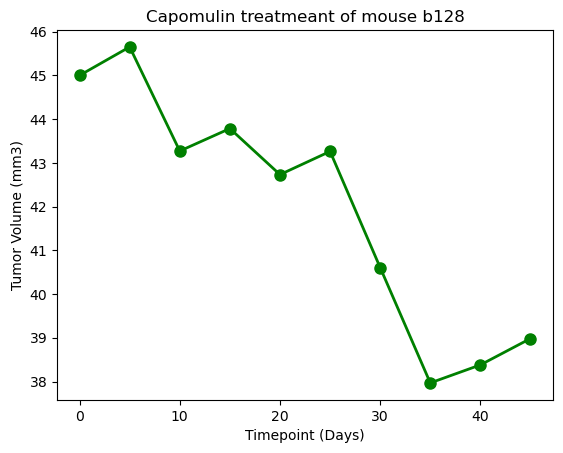

In [296]:
# Capture first Mouse ID in the capomulin table (so we can save time by not looking through the data
# manually to find a Mouse ID number
first_capomulin_mouse = capomulin["Mouse ID"].iloc[0]

# Capture the data for one most over all timepoints during the Capomulin Drug Regimen
capomulin_line_plot = capomulin.loc[capomulin["Mouse ID"] == first_capomulin_mouse,:]

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = capomulin_line_plot["Timepoint"]
yaxis = capomulin_line_plot["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title(f'Capomulin treatmeant of mouse {first_capomulin_mouse}')
plt.plot(x_axis, yaxis,linewidth=2, markersize=8,marker="o",color="green")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# save figure to file in project directory
plt.savefig('../Pymaceuticals/data/line_plot.png', bbox_inches='tight')

# show line plot
plt.show()

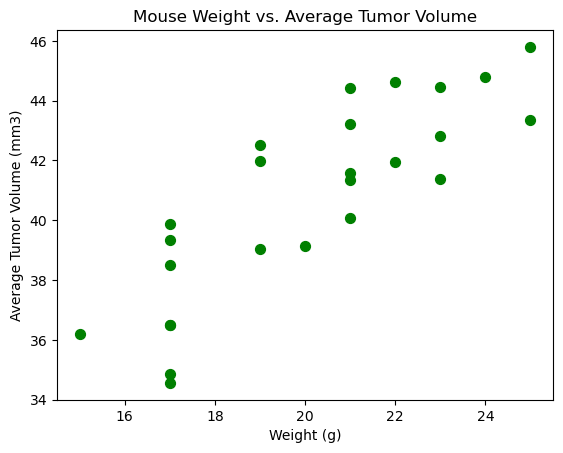

In [300]:
# Calculate and capture the mean value of the tumor volume to be on the scatter plot
mean_capo_vol = capomulin.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
ax1.scatter(mean_capo_vol['Weight (g)'], mean_capo_vol['Tumor Volume (mm3)'], color="green", s=50)
ax1.set_title('Mouse Weight vs. Average Tumor Volume')
ax1.set_xlabel('Weight (g)')
ax1.set_ylabel('Average Tumor Volume (mm3)')

# save figure to file in project directory
plt.savefig('../Pymaceuticals/data/scatter_plot.png', bbox_inches='tight')

# show the scatter plot
plt.show()

## Correlation and Regression

In [301]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mean_capo_vol['Weight (g)'],mean_capo_vol['Tumor Volume (mm3)'])

# set x and y axis values for correlation line plot
x_axis = mean_capo_vol['Weight (g)']
y_axis = mean_capo_vol['Tumor Volume (mm3)']

# calculate and captrue the slope, intercept, rvalue, pvalue, and stderr from the linregress of the correlation between Weight and Tumor Volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

# Calulate the line equatino that will show when we graph this line on the scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print the results of these calculations to terminal
print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation[0],4)}")
print(f"The slope of the correlation line is: {slope}")
print(f"The intercept value of this line is: {intercept}")
print(f"The r-value (Correlation coefficient) is: {rvalue}")
print(f"P Value is: {pvalue}")
print(f"Standard Error Value is: {stderr}")
print(line_eq)


The correlation between mouse weight and the average tumor volume is: 0.8419
The slope of the correlation line is: 0.9544396890241049
The intercept value of this line is: 21.552160532685008
The r-value (Correlation coefficient) is: 0.8419363424694721
P Value is: 1.3225722434712404e-07
Standard Error Value is: 0.12754359033201323
y = 0.95x + 21.55


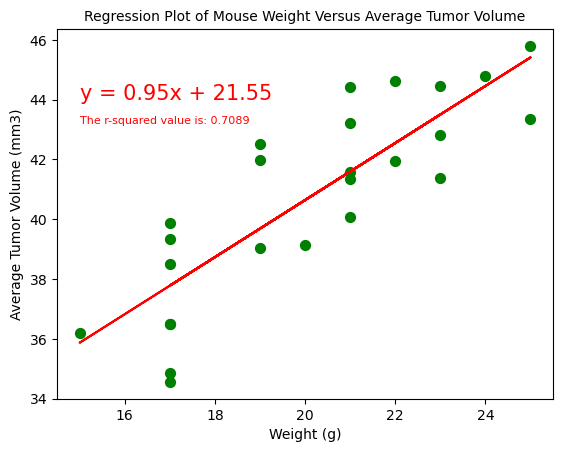

In [303]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots()
plt.scatter(x_axis,y_axis,s=50, color="green")
plt.plot(x_axis,regress_values,color="red")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize = 10)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =10)
ax1.annotate(line_eq, xy=(15, 44), fontsize=15,color="red")
ax1.annotate(f"The r-squared value is: {round(rvalue**2,4)}", xy=(15, 43.2), fontsize=8,color="red")

# save figure to file in project directory
plt.savefig('../Pymaceuticals/data/regression_scatter_plot.png', bbox_inches='tight')

# Display the regression scatter plot
plt.show()